<a href="https://colab.research.google.com/github/RaincallerMei/Game-Developing-Learning/blob/main/Intro_To_Deep_Learning_With_PyTorch_Deep_Learning_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:

import torch
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1) #fc1 = fully connected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [30]:
torch.manual_seed(41)
model = Model()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [32]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

<ipython-input-32-4c3175dde3a4>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [33]:
from sklearn.model_selection import train_test_split

# Train Test Split!  Set X, y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

# Convert these to numpy arrays
X = X.values
y = y.values

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)


In [37]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert X features to float tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [38]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
#Direct support for classification tasks: You only need to provide the logits and class indices;  Combines LogSoftmax and NLLLoss internally.
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)#The lower lr is, the longer it's going to take to train

In [47]:
#epoch -> iteration thru all the training data in our network
epoch = 500
losses = [] #track how much the loss is decreasing
for i in range (epoch):
  y_pred = model.forward(X_train)# get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.0003374353109393269
Epoch: 10 and loss: 0.0003311032196506858
Epoch: 20 and loss: 0.0003249384753871709
Epoch: 30 and loss: 0.00031892454717308283
Epoch: 40 and loss: 0.0003130644909106195
Epoch: 50 and loss: 0.0003073435800615698
Epoch: 60 and loss: 0.0003017688577529043
Epoch: 70 and loss: 0.00029633150552399457
Epoch: 80 and loss: 0.00029102087137289345
Epoch: 90 and loss: 0.000285835936665535
Epoch: 100 and loss: 0.000280779815511778
Epoch: 110 and loss: 0.00027584476629272103
Epoch: 120 and loss: 0.0002710238331928849
Epoch: 130 and loss: 0.00026631218497641385
Epoch: 140 and loss: 0.000261704990407452
Epoch: 150 and loss: 0.0002572151424828917
Epoch: 160 and loss: 0.00025282689603045583
Epoch: 170 and loss: 0.0002485353616066277
Epoch: 180 and loss: 0.00024434260558336973
Epoch: 190 and loss: 0.00024024276353884488
Epoch: 200 and loss: 0.00023623378365300596
Epoch: 210 and loss: 0.00023231588420458138
Epoch: 220 and loss: 0.0002284920192323625
Epoch: 230 and 

Text(0.5, 0, 'Epoch')

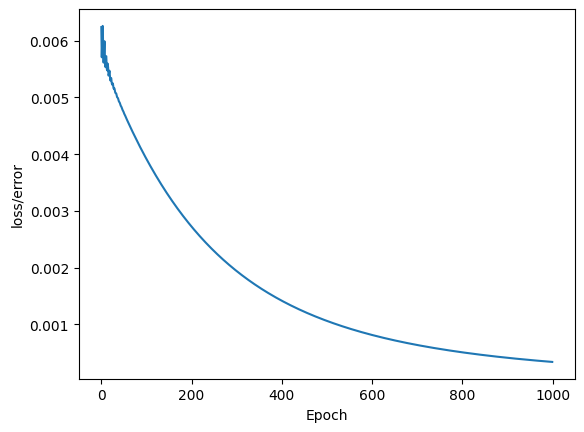

In [46]:
# Graph it out!
plt.plot(range(epoch), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')